#LOAD DATA DAN IMPORT LIBRARIES

In [1]:
#Importing Libraries
import pandas as pd
import numpy as np
import matplotlib as mt
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import mode
import seaborn as sns
from sklearn.feature_selection import SelectKBest, chi2, f_classif
from imblearn.over_sampling import SMOTENC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve
from sklearn.model_selection import train_test_split

In [2]:
#Load data
data = pd.read_csv("Employee Promotion_train.csv")
data.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,60,0
2,7513,Sales & Marketing,region_19,Bachelor's,m,sourcing,1,34,3.0,7,0,50,0
3,2542,Sales & Marketing,region_23,Bachelor's,m,other,2,39,1.0,10,0,50,0
4,48945,Technology,region_26,Bachelor's,m,other,1,45,3.0,2,0,73,0


# DATA PREPARATION AND EXPLORATORY DATA ANALYSIS

In [3]:
#Checking data dimension
data.shape

(54808, 13)

In [4]:
#Checking data types
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings           int64
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?               int64
avg_training_score        int64
is_promoted               int64
dtype: object

In [5]:
#Converting data types
data["awards_won?"] = data["awards_won?"].astype(str)
data["is_promoted"] = data["is_promoted"].astype(str)
data["no_of_trainings"] = data["no_of_trainings"].astype(str)
data.dtypes

employee_id               int64
department               object
region                   object
education                object
gender                   object
recruitment_channel      object
no_of_trainings          object
age                       int64
previous_year_rating    float64
length_of_service         int64
awards_won?              object
avg_training_score        int64
is_promoted              object
dtype: object

In [6]:
#Changing data categories
data['no_of_trainings'] = data['no_of_trainings'].replace({'2':'>1', '3':'>1','4':'>1','5':'>1','6':'>1','7':'>1','8':'>1','9':'>1','10':'>1'})
data['awards_won?'] = data['awards_won?'].replace({'0':'No','1':'Yes'})

In [7]:
#Detecting Missing Value
np.sum(data.isnull())

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [8]:
#Missing Value Imputation
data["education"] = data["education"].fillna(data["education"].mode()[0])
data["previous_year_rating"] = data["previous_year_rating"].fillna(data["previous_year_rating"].median())
np.sum(data.isnull())

employee_id             0
department              0
region                  0
education               0
gender                  0
recruitment_channel     0
no_of_trainings         0
age                     0
previous_year_rating    0
length_of_service       0
awards_won?             0
avg_training_score      0
is_promoted             0
dtype: int64

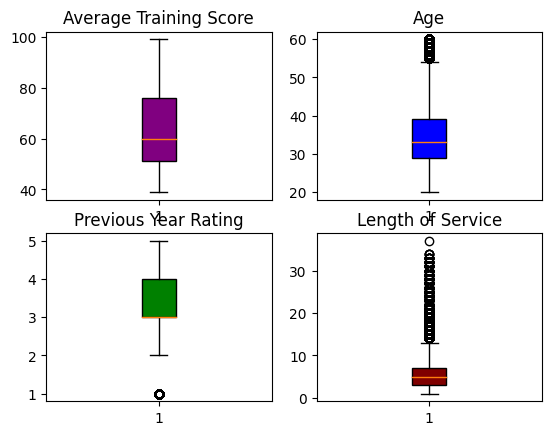

In [9]:
from matplotlib import color_sequences
#Checking Outlier
figure, axis=plt.subplots(2,2)
axis[0, 0].boxplot(data["avg_training_score"],patch_artist=True,boxprops=dict(facecolor='purple'))
axis[0, 0].set_title("Average Training Score")

axis[0, 1].boxplot(data["age"],patch_artist=True,boxprops=dict(facecolor='blue'))
axis[0, 1].set_title("Age")

axis[1, 0].boxplot(data["previous_year_rating"],patch_artist=True,boxprops=dict(facecolor='green'))
axis[1, 0].set_title("Previous Year Rating")

axis[1, 1]. boxplot(data["length_of_service"],patch_artist=True,boxprops=dict(facecolor='maroon'))
axis[1, 1].set_title("Length of Service")

plt.show()

In [10]:
#Removing Outlier for Age
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

data = data[data['age'] <= upper]
data = data[data['age'] >= lower]
data.shape

(53373, 13)

In [11]:
#Removing Outlier for Previous Year Rating
Q1 = data['previous_year_rating'].quantile(0.25)
Q3 = data['previous_year_rating'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

data = data[data['previous_year_rating'] <= upper]
data = data[data['previous_year_rating'] >= lower]
data.shape

(47332, 13)

In [12]:
#Removing Outlier for Length of Service
Q1 = data['length_of_service'].quantile(0.25)
Q3 = data['length_of_service'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

data = data[data['length_of_service'] <= upper]
data = data[data['length_of_service'] >= lower]
data.shape

(44879, 13)

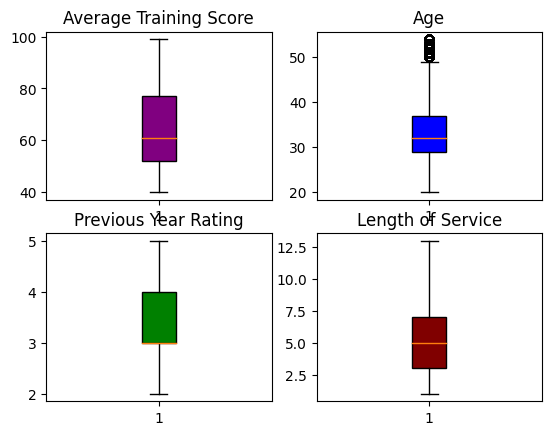

In [13]:
#Checking Outlier
figure, axis=plt.subplots(2,2)
axis[0, 0].boxplot(data["avg_training_score"],patch_artist=True,boxprops=dict(facecolor='purple'))
axis[0, 0].set_title("Average Training Score")

axis[0, 1].boxplot(data["age"],patch_artist=True,boxprops=dict(facecolor='blue'))
axis[0, 1].set_title("Age")

axis[1, 0].boxplot(data["previous_year_rating"],patch_artist=True,boxprops=dict(facecolor='green'))
axis[1, 0].set_title("Previous Year Rating")

axis[1, 1]. boxplot(data["length_of_service"],patch_artist=True,boxprops=dict(facecolor='maroon'))
axis[1, 1].set_title("Length of Service")

plt.show()

In [14]:
#Removing Outlier for Age
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

data = data[data['age'] <= upper]
data = data[data['age'] >= lower]
data.shape

(43888, 13)

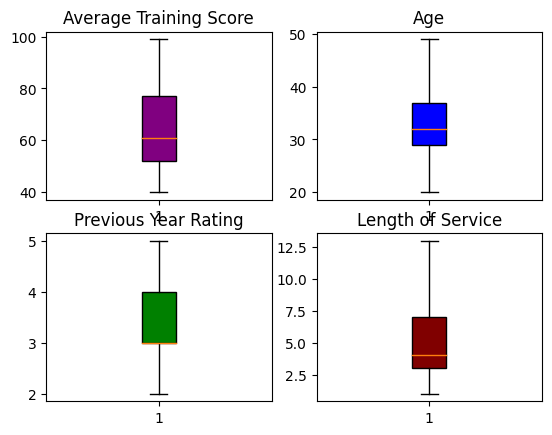

In [15]:
#Checking Outlier
figure, axis=plt.subplots(2,2)
axis[0, 0].boxplot(data["avg_training_score"],patch_artist=True,boxprops=dict(facecolor='purple'))
axis[0, 0].set_title("Average Training Score")

axis[0, 1].boxplot(data["age"],patch_artist=True,boxprops=dict(facecolor='blue'))
axis[0, 1].set_title("Age")

axis[1, 0].boxplot(data["previous_year_rating"],patch_artist=True,boxprops=dict(facecolor='green'))
axis[1, 0].set_title("Previous Year Rating")

axis[1, 1]. boxplot(data["length_of_service"],patch_artist=True,boxprops=dict(facecolor='maroon'))
axis[1, 1].set_title("Length of Service")

plt.show()

0    39656
1     4232
Name: is_promoted, dtype: int64


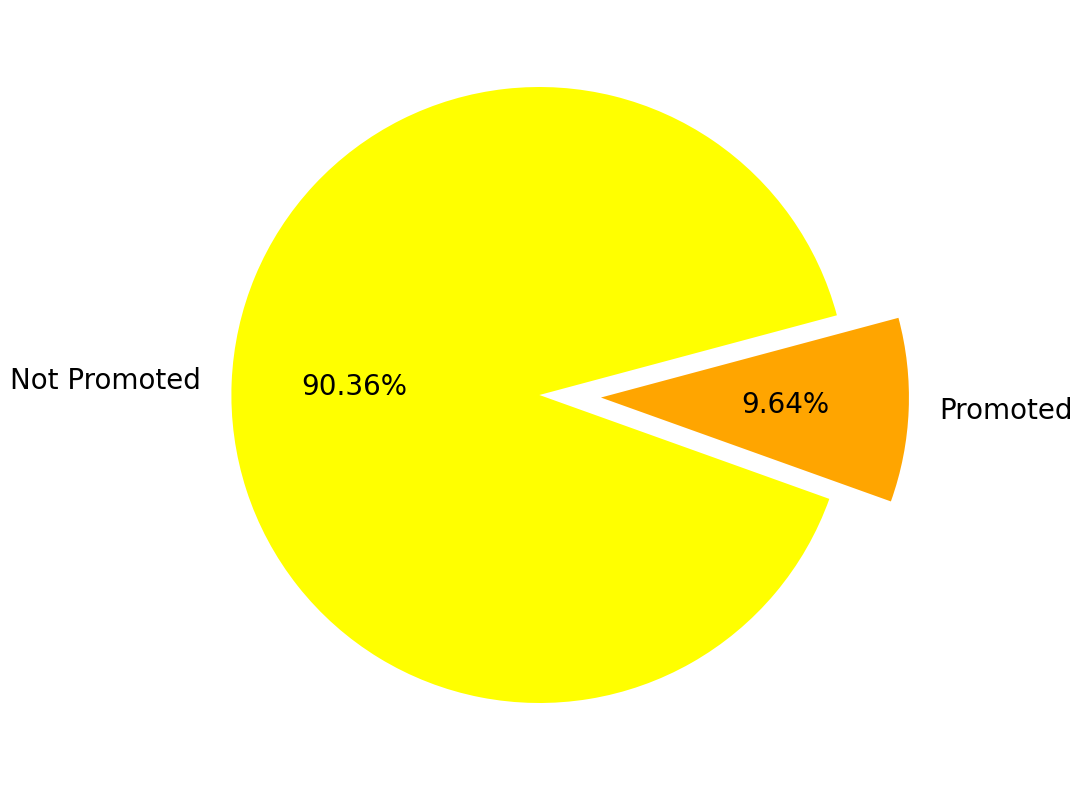

In [16]:
#The proportion of promoted employee
promotion = data['is_promoted'].value_counts()
print(promotion)
plt.figure(figsize=(10,10))
promotion_status = ['Not Promoted','Promoted']
promotion_number = [39656, 4232]
explode = [0, 0.2]
colors = ['yellow','orange']
plt.pie(promotion_number, labels=promotion_status, explode=explode, autopct='%1.2f%%', startangle=15, colors=colors,
       textprops = {'fontsize':20})
plt.show()

In [17]:
#pip install matplotlib==3.4.2

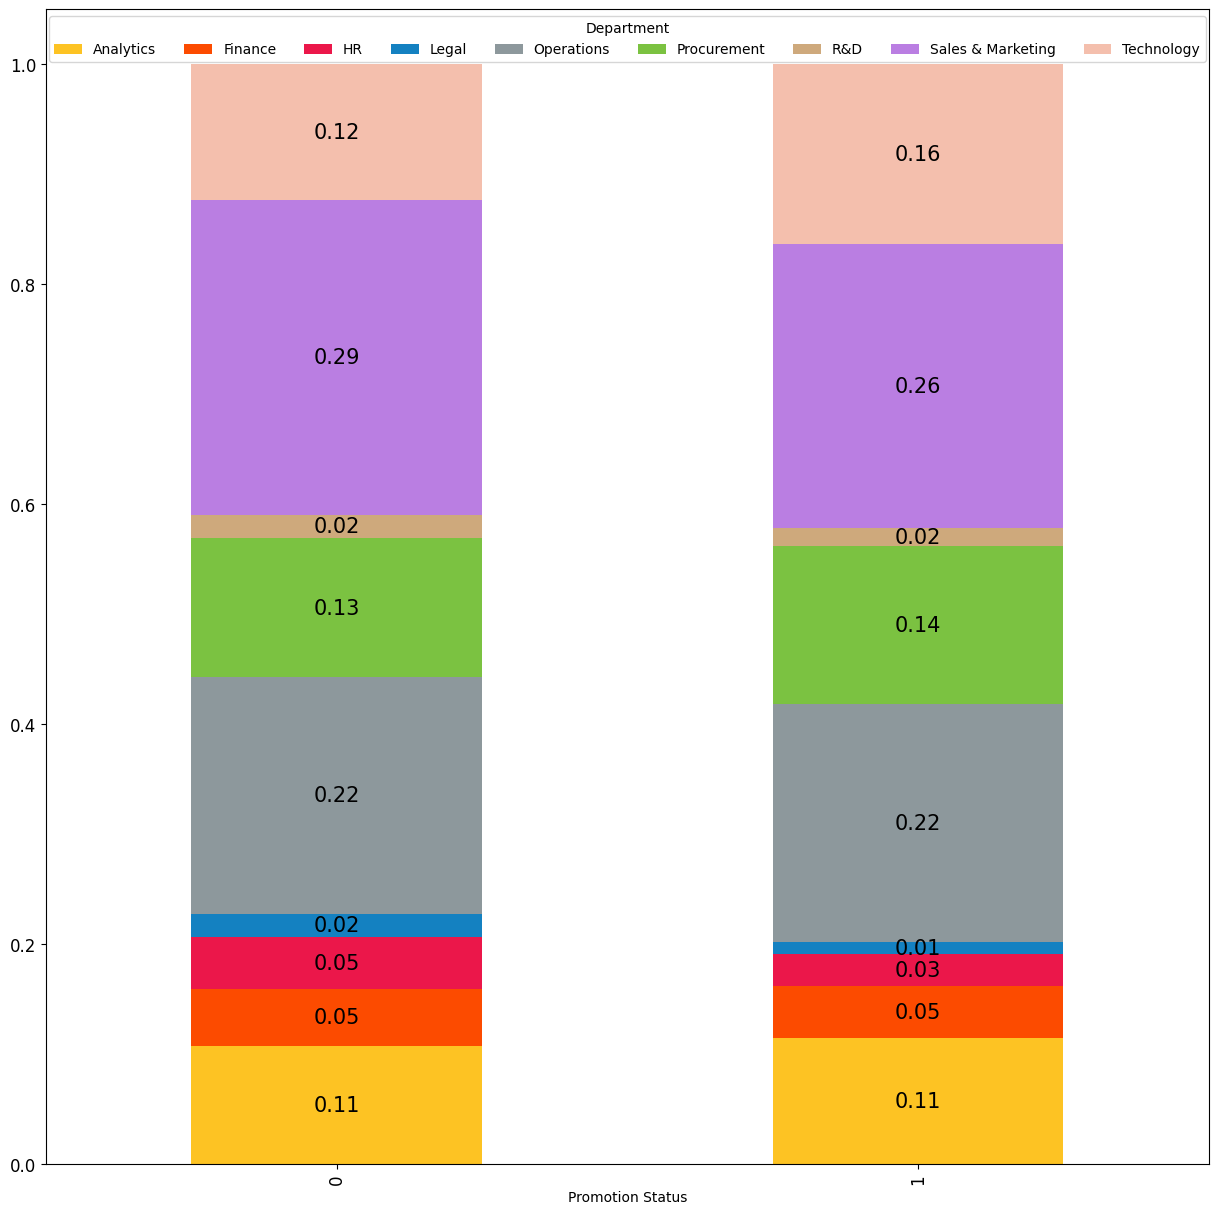

In [18]:
#The proportion of promoted employee each department
dept = data.groupby('is_promoted')['department'].value_counts(normalize=True).unstack('department').plot(kind='bar',
    stacked=True,figsize=(15,15), legend=False, fontsize=12, color=['#fdc323','#fc4b00','#eb174a','#1481c1','#8d989c','#7bc241','#cea97c','#ba7ee2','#f4bfad'])
for c in dept.containers:
  dept.bar_label(c, fmt='%.2f', label_type='center', fontsize=15)
plt.xlabel("Promotion Status", fontsize=10)
plt.legend(title="Department", ncol=9, loc='upper center')

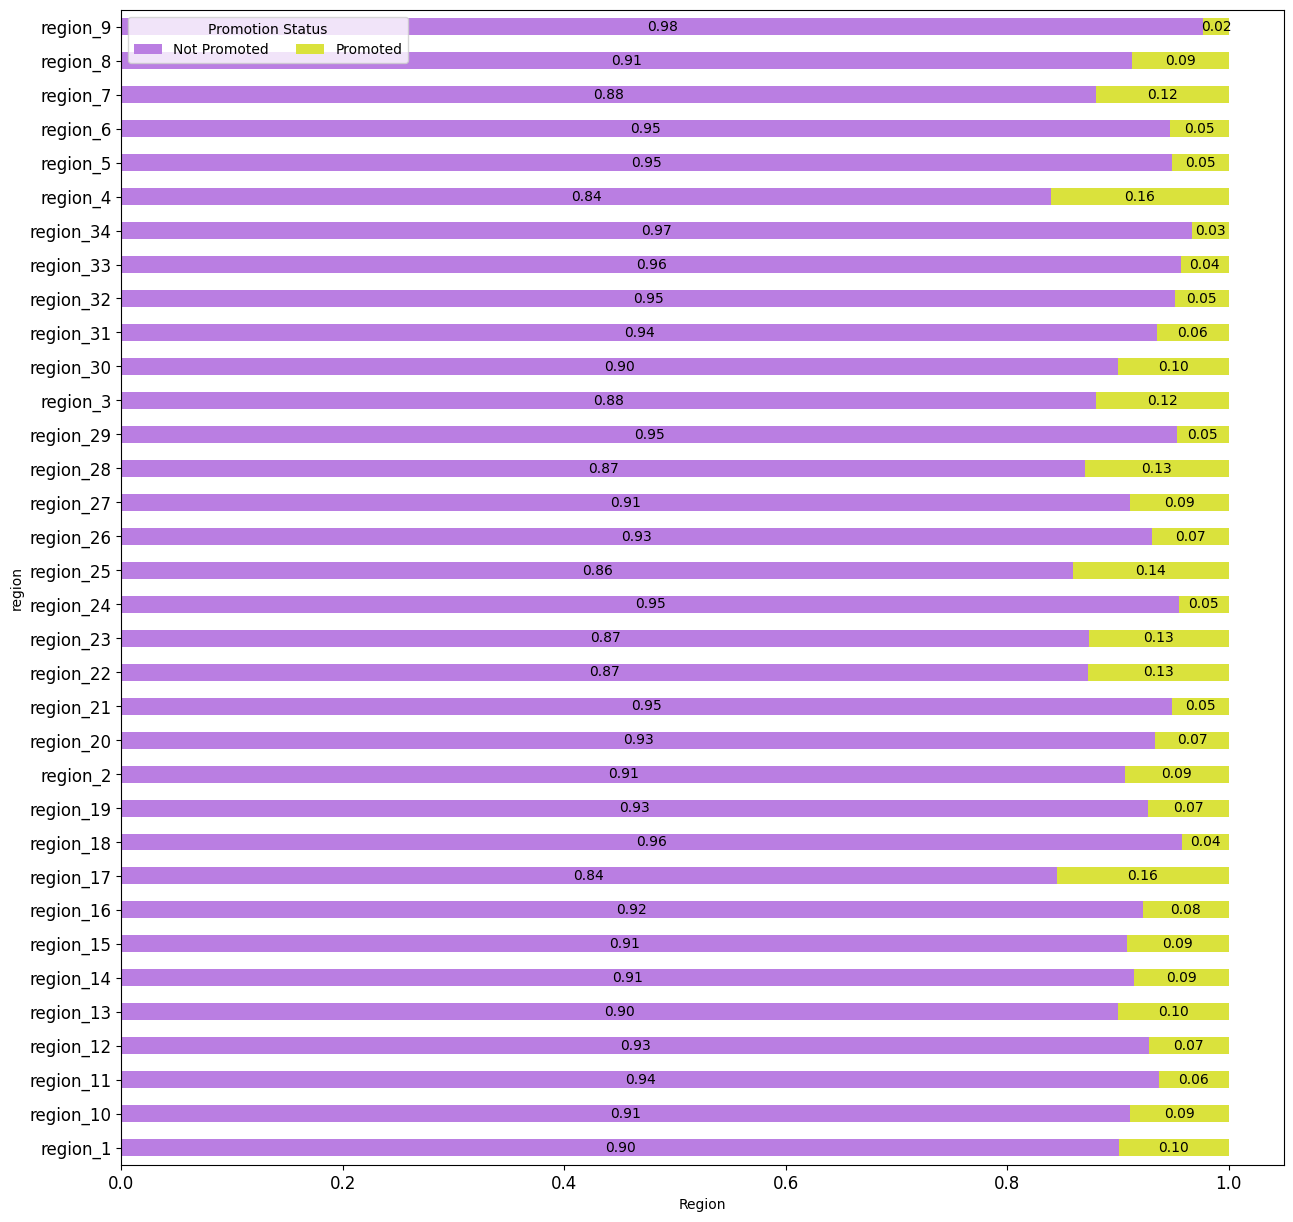

In [19]:
#The proportion of promoted employee each region
region = data.groupby('region')['is_promoted'].value_counts(normalize=True).unstack('is_promoted').plot(kind='barh',
    stacked=True,figsize=(15,15),legend=False, fontsize=12, color=['#ba7ee2','#dae23c'])
for c in region.containers:
  region.bar_label(c, fmt='%.2f', label_type='center')
plt.xlabel("Region")
plt.legend(["Not Promoted","Promoted"], title="Promotion Status", ncol=2, loc='upper left')

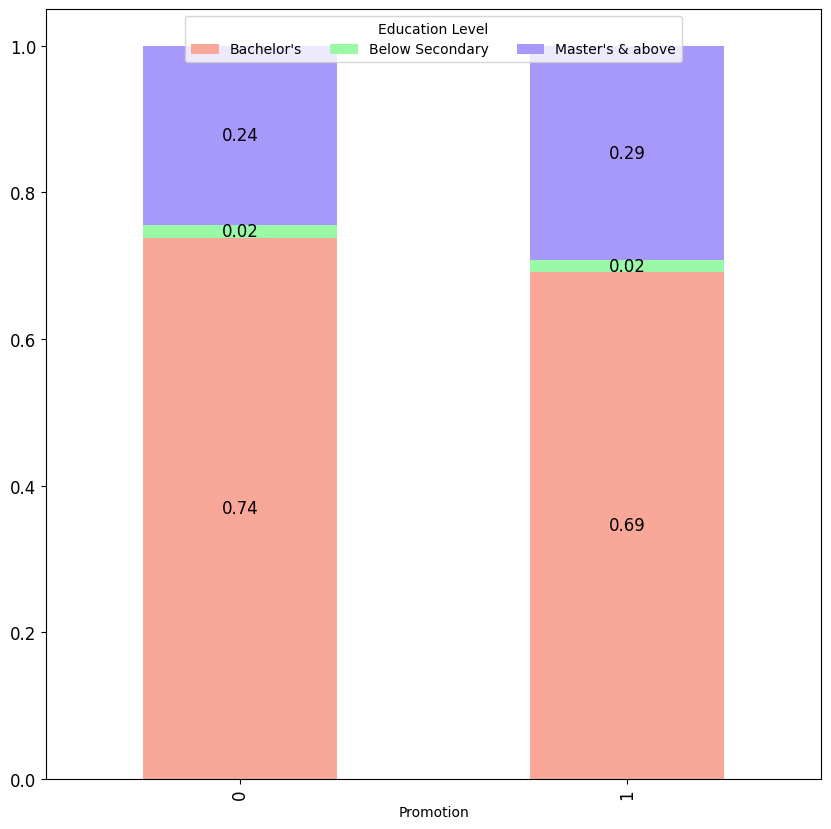

In [20]:
#The proportion of promoted employee each education level
education = data.groupby('is_promoted')['education'].value_counts(normalize=True).unstack('education').plot(kind='bar',
    stacked=True,figsize=(10,10), legend=False, fontsize=12, color=['#f9a799','#99f9a7','#a799f9'])
for c in education.containers:
  education.bar_label(c, fmt='%.2f', label_type='center', fontsize=12)
plt.xlabel("Promotion")
plt.legend(title="Education Level", ncol=3, loc='upper center')

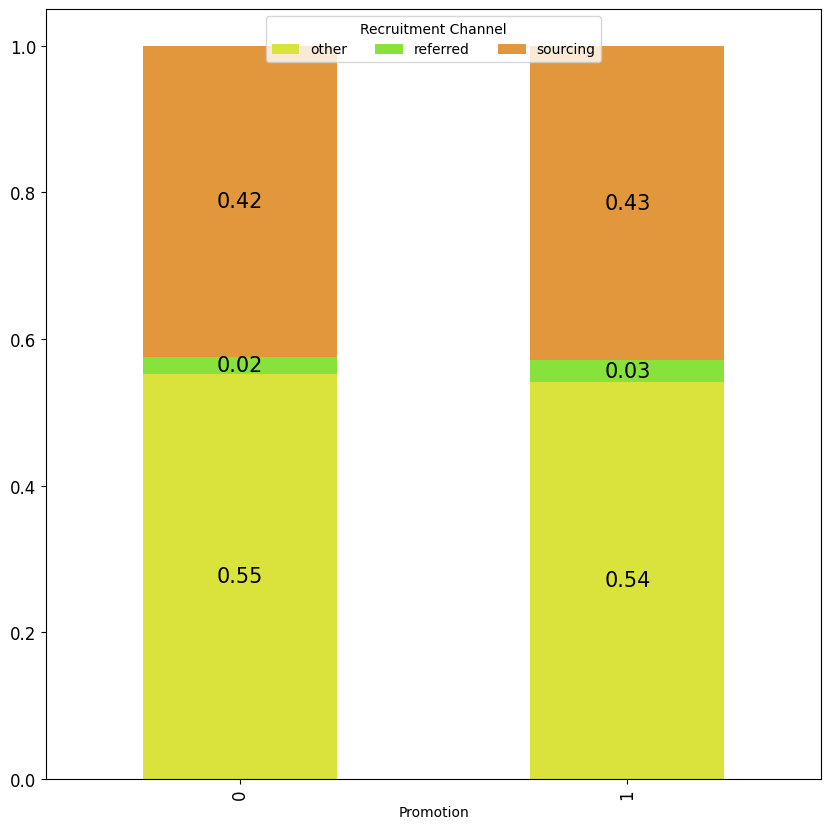

In [21]:
#The proportion of promoted employee each recruitment channel
rec = data.groupby('is_promoted')['recruitment_channel'].value_counts(normalize=True).unstack('recruitment_channel').plot(kind='bar',
    stacked=True,figsize=(10,10), legend=False, fontsize=12, color=['#dae23c','#87e23c','#e2973c'])
for c in rec.containers:
  rec.bar_label(c, fmt='%.2f', label_type='center',fontsize=15)
plt.xlabel("Promotion")
plt.legend(title="Recruitment Channel", ncol=3, loc='upper center')

is_promoted  gender
0            m         27861
             f         11795
1            m          2899
             f          1333
Name: gender, dtype: int64


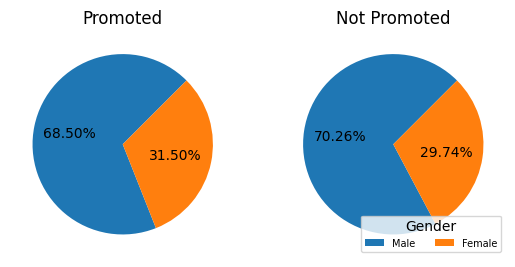

In [22]:
#The proportion of promoted employee by gender
g = data.groupby('is_promoted')['gender'].value_counts()
print(g)
promoted = ['Male','Female']
promoted_number = [2899, 1333]
not_promoted = ['Male','Female']
not_promoted_number = [27861, 11795]
figure, axis=plt.subplots(1,2)
axis[0].pie(promoted_number, autopct='%1.2f%%', startangle=45,
       textprops = {'fontsize':10})
axis[0].set_title("Promoted")
axis[1].pie(not_promoted_number, autopct='%1.2f%%', startangle=45,
       textprops = {'fontsize':10})
axis[1].set_title("Not Promoted")
plt.legend(["Male","Female"], title="Gender", ncol=2, loc='lower right',fontsize=7)
plt.show()

is_promoted  awards_won?
0            No             39078
             Yes              578
1            No              3724
             Yes              508
Name: awards_won?, dtype: int64


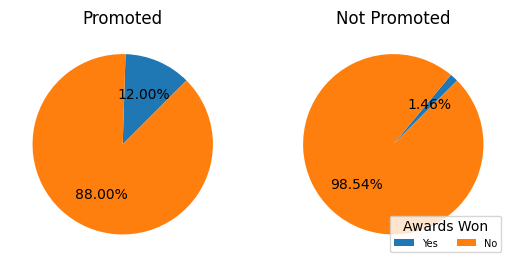

In [23]:
#The proportion of promoted employee by awards won
a = data.groupby('is_promoted')['awards_won?'].value_counts()
print(a)
promoted1 = ['Yes','No']
promoted_number1 = [508, 3724]
not_promoted1 = ['Yes','No']
not_promoted_number1 = [578, 39078]
figure, axis=plt.subplots(1,2)
axis[0].pie(promoted_number1, autopct='%1.2f%%', startangle=45,
       textprops = {'fontsize':10})
axis[0].set_title("Promoted")
axis[1].pie(not_promoted_number1, autopct='%1.2f%%', startangle=45,
       textprops = {'fontsize':10})
axis[1].set_title("Not Promoted")
plt.legend(['Yes','No'],title="Awards Won", ncol=2, loc='lower right',fontsize=7)
plt.show()

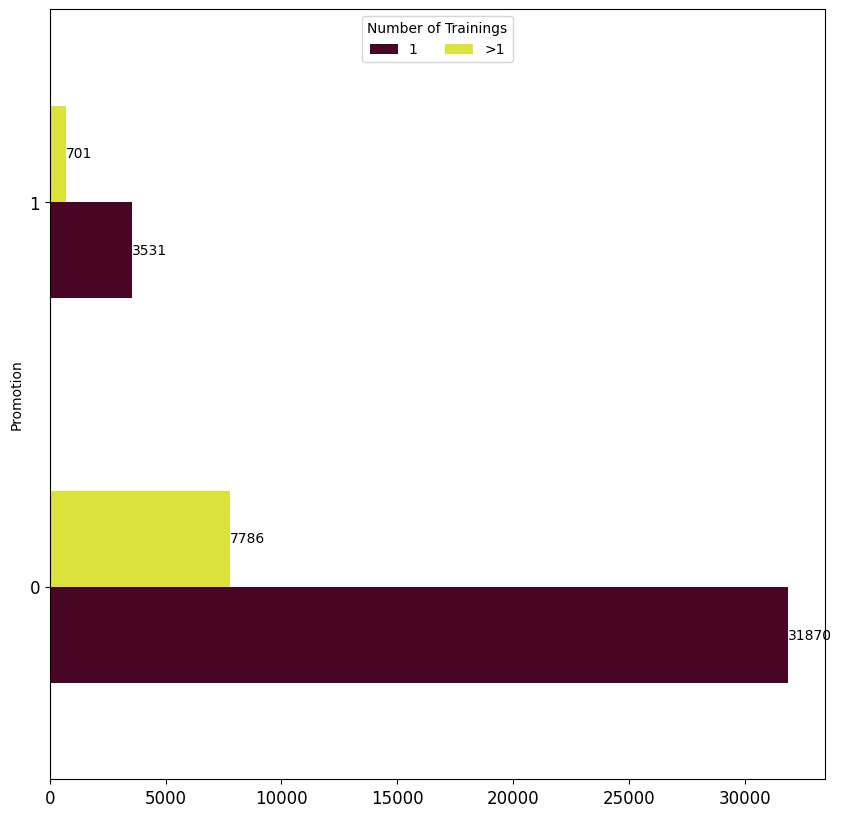

In [24]:
#The proportion of promoted employee by number of trainings
numtrain = data.groupby('is_promoted')['no_of_trainings'].value_counts().unstack('no_of_trainings').plot(kind='barh',
    stacked=False,figsize=(10,10), legend=False, fontsize=12, color=['#490624','#dae23c'])
for c in numtrain.containers:
  numtrain.bar_label(c, fmt='%.0f', label_type='edge')
plt.ylabel("Promotion")
plt.legend(title="Number of Trainings", ncol=10, loc='upper center')

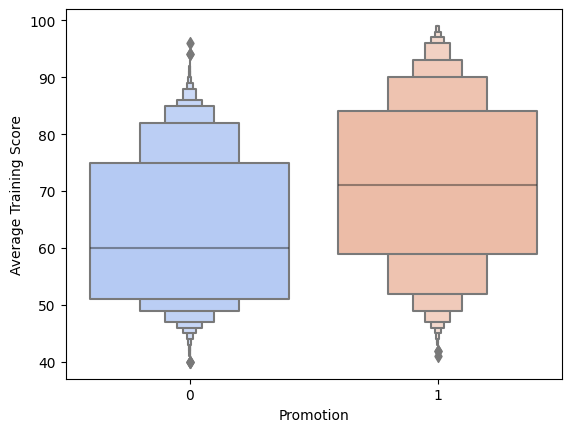

In [25]:
sns.boxenplot(x=data['is_promoted'], y=data['avg_training_score'],palette='coolwarm')
plt.ylabel("Average Training Score")
plt.xlabel("Promotion")
plt.show()

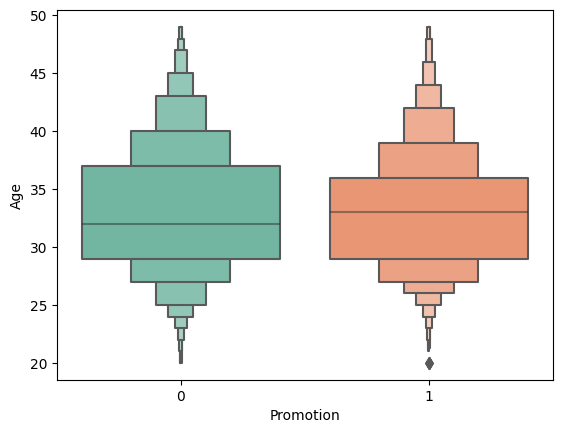

In [26]:
sns.boxenplot(x=data['is_promoted'], y=data['age'],palette='Set2')
plt.ylabel("Age")
plt.xlabel("Promotion")
plt.show()

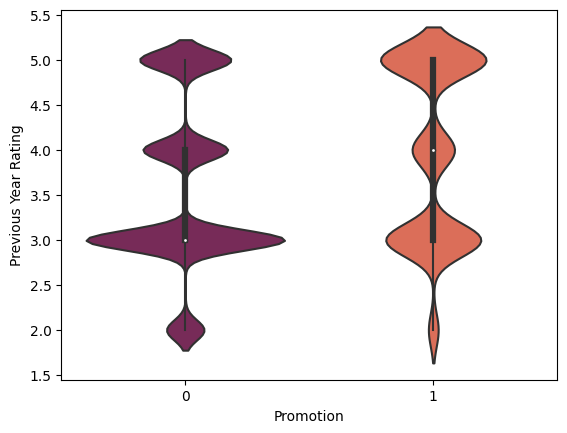

In [27]:
sns.violinplot(x=data['is_promoted'], y=data['previous_year_rating'],palette='rocket')
plt.ylabel("Previous Year Rating")
plt.xlabel("Promotion")
plt.show()

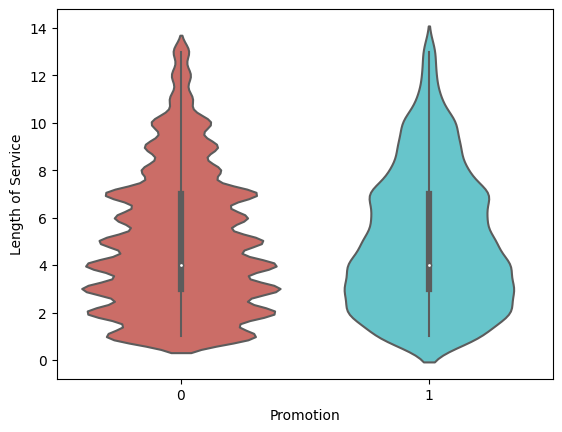

In [28]:
sns.violinplot(x=data['is_promoted'], y=data['length_of_service'],palette="hls")
plt.ylabel("Length of Service")
plt.xlabel("Promotion")
plt.show()

In [29]:
data1 = data.drop(columns=['employee_id','awards_won?','is_promoted','department','region','education','gender','recruitment_channel','no_of_trainings'],axis=0)
data1.head(5)

,age,previous_year_rating,length_of_service,avg_training_score
0,35,5.0,8,49
1,30,5.0,4,60
2,34,3.0,7,50
4,45,3.0,2,73
5,31,3.0,7,85


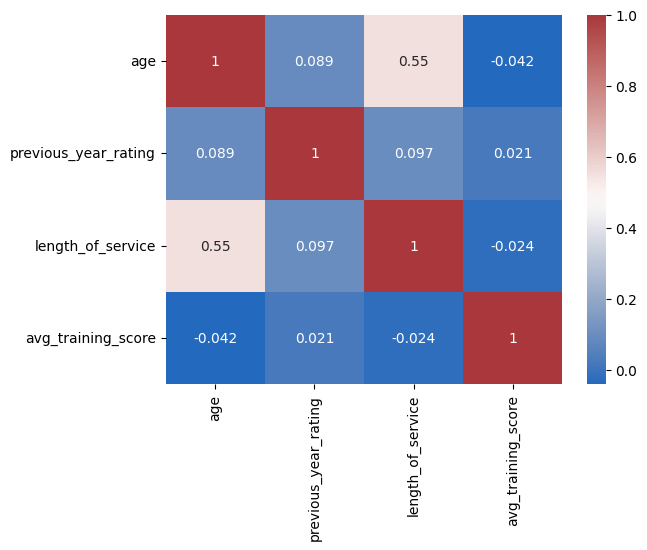

In [30]:
corr = data1.corr()
sns.heatmap(corr, annot=True, cmap='vlag')
plt.show()

#BALANCING THE DATA

In [31]:
x = data.drop(columns=['is_promoted','employee_id'],axis=1)
x = pd.get_dummies(x)
y = data['is_promoted']
smotenc = SMOTENC(categorical_features=[data.dtypes==object], random_state=123,  sampling_strategy=0.7, k_neighbors=5)
x_res, y_res = smotenc.fit_resample(x, y)

In [32]:
y_res.value_counts()

0    39656
1    27759
Name: is_promoted, dtype: int64

In [33]:
data_res = pd.concat([x_res,y_res],axis=1,join='inner')
data_res.head(5)

,age,previous_year_rating,length_of_service,avg_training_score,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,...,gender_f,gender_m,recruitment_channel_other,recruitment_channel_referred,recruitment_channel_sourcing,no_of_trainings_1,no_of_trainings_>1,awards_won?_No,awards_won?_Yes,is_promoted
0,35,5.0,8,49,0,0,0,0,0,0,...,1,0,0,0,1,1,0,1,0,0
1,30,5.0,4,60,0,0,0,0,1,0,...,0,1,1,0,0,1,0,1,0,0
2,34,3.0,7,50,0,0,0,0,0,0,...,0,1,0,0,1,1,0,1,0,0
3,45,3.0,2,73,0,0,0,0,0,0,...,0,1,1,0,0,1,0,1,0,0
4,31,3.0,7,85,1,0,0,0,0,0,...,0,1,0,0,1,0,1,1,0,0


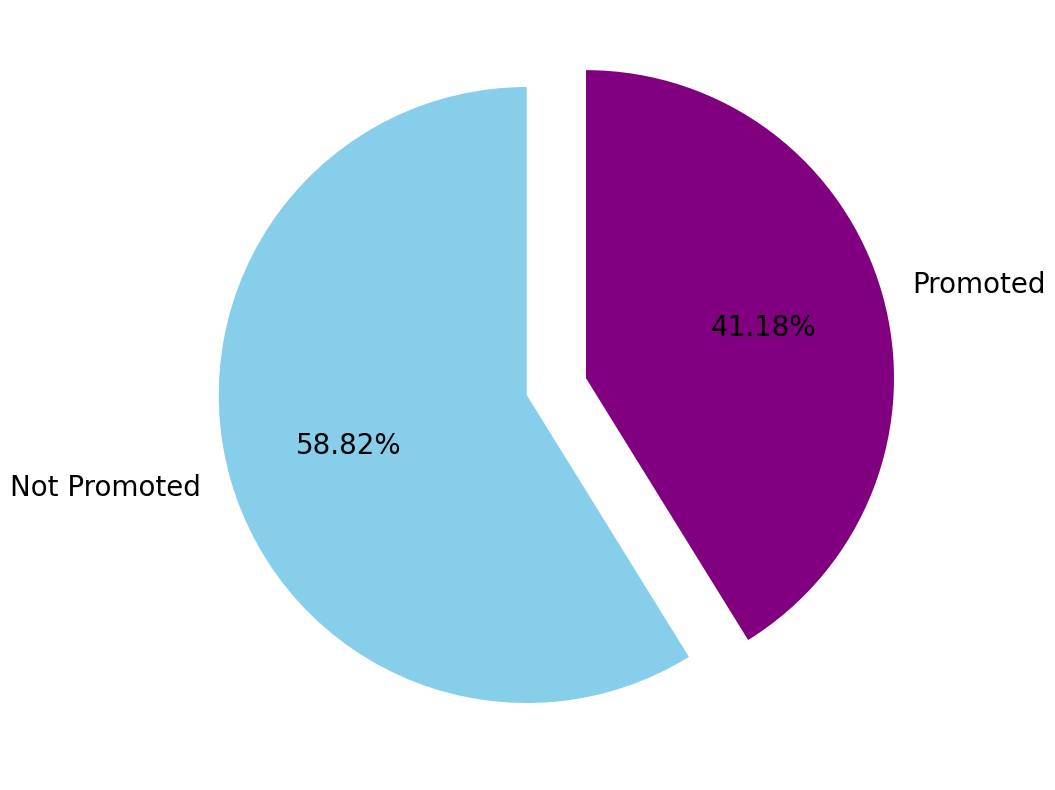

In [34]:
plt.figure(figsize=(10,10))
resampled_status = ['Not Promoted','Promoted']
resampled_number = [39656, 27759]
explode = [0, 0.2]
colors = ['skyblue','purple']
plt.pie(resampled_number, labels=resampled_status, explode=explode, autopct='%1.2f%%', startangle=90, colors=colors,
       textprops = {'fontsize':20})
plt.show()

#FEATURE SELECTION

In [35]:
#Filter method (Chi-square)

x_cat = x_res.drop(columns=['age','avg_training_score','length_of_service','previous_year_rating'], axis=1)

bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(x_cat,y_res)
#create df for scores
dfscores = pd.DataFrame(fit.scores_)
#create df for column names
dfcolumns = pd.DataFrame(x_cat.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
#naming the dataframe columns
featureScores.columns = ['Selected Columns','Chi-sq']
#print 10 best features
print(featureScores.nlargest(15,'Chi-sq'))

      Selected Columns       Chi-sq
54     awards_won?_Yes  2028.868288
2        department_HR   836.525483
1   department_Finance   632.544541
33    region_region_31   510.343049
6       department_R&D   379.783495
34    region_region_32   369.989748
11    region_region_11   362.758644
30    region_region_29   357.634720
27    region_region_26   341.261664
38     region_region_5   314.755068
52  no_of_trainings_>1   312.265281
16    region_region_16   300.347194
3     department_Legal   295.088115
39     region_region_6   255.914881
21    region_region_20   252.991703


In [36]:
#Filter Method (ANOVA)
x_num = data_res[["age","previous_year_rating","length_of_service","avg_training_score"]]
fs = SelectKBest(score_func=f_classif, k=2)
fit1 = fs.fit(x_num, y_res)
#create df for scores
dfscores1 = pd.DataFrame(fit1.scores_)

#create df for column names
dfcolumns1 = pd.DataFrame(x_num.columns)

#concat two dataframes for better visualization
featureScores1 = pd.concat([dfcolumns1,dfscores1],axis=1)

#naming the dataframe columns
featureScores1.columns = ['Selected Columns','Score_ANOVA']

#print 2 best features
print(featureScores1.nlargest(2,'Score_ANOVA'))

       Selected Columns  Score_ANOVA
3    avg_training_score  5157.336422
1  previous_year_rating  4923.134766


#RANDOM FOREST CLASSIFICATION

In [37]:
cat = x_res.drop(columns=['avg_training_score','previous_year_rating','age','length_of_service',
                          "education_Bachelor's", "education_Below Secondary", "education_Master's & above",
                          'recruitment_channel_other','recruitment_channel_referred','recruitment_channel_sourcing',
                          'gender_f','gender_m'],axis=1)
num = x_res[['avg_training_score','previous_year_rating']]
x_res2 = pd.concat([cat,num],axis=1)
x_res2.head(5)

,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,...,region_region_6,region_region_7,region_region_8,region_region_9,no_of_trainings_1,no_of_trainings_>1,awards_won?_No,awards_won?_Yes,avg_training_score,previous_year_rating
0,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,1,0,1,0,49,5.0
1,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,1,0,1,0,60,5.0
2,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,0,1,0,50,3.0
3,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,73,3.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,0,85,3.0


In [38]:
y_res = y_res.astype(int)
x_res_train, x_res_test, y_res_train, y_res_test = train_test_split(x_res2,y_res, test_size = 0.2,stratify=y_res,
                                                    random_state=123)
rf = RandomForestClassifier(random_state=123)

cm=[]
total=[]
ac=[]
se=[]
sp=[]

n=5
for j in range (n):
    rf =rf.fit(x_res_train,y_res_train)
    y_pred = rf.predict(x_res_test)
    cm.append((confusion_matrix(y_res_test, y_pred)).astype(float))
    total.append(sum(sum(cm[j])))
    ac.append((cm[j][0,0]+cm[j][1,1])/total[j])
    se.append(cm[j][0,0]/(cm[j][0,0]+cm[j][0,1]))
    sp.append(cm[j][1,1]/(cm[j][1,0]+cm[j][1,1]))

#Calculating accuracy, spesificity, and sensitivity
akurasi=np.mean(ac)*100
spesifisiti=np.mean(sp)*100
sensitiviti=np.mean(se)*100
print("Accuracy : ",akurasi)
print("Spesificity : ",spesifisiti)
print("Sensitivity : ",sensitiviti)
#Calculating AUC
auc_rf= round(roc_auc_score(y_res_test, y_pred)*100, 2)
print("AUC Score : ",auc_rf)

Accuracy :  88.31120670473929
Spesificity :  82.38472622478386
Sensitivity :  92.45996721724877
AUC Score :  87.42


<function matplotlib.pyplot.show(close=None, block=None)>

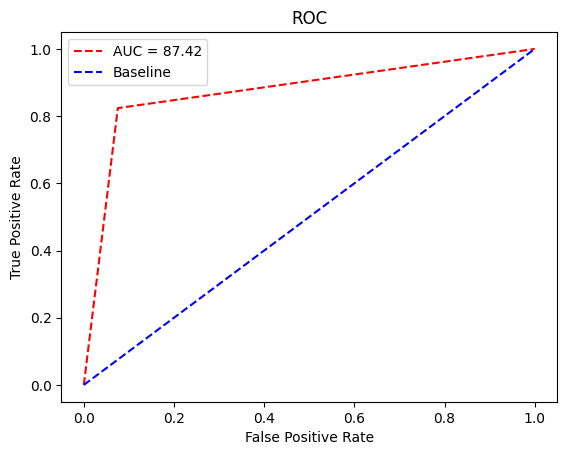

In [39]:
#Calculating ROC
rf_fpr, rf_tpr, _ = roc_curve(y_res_test, y_pred)

#ROC curve
plt.plot(rf_fpr, rf_tpr, linestyle = '--', label = f'AUC = {auc_rf:.2f}', color='red')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--', label='Baseline')
plt.title('ROC')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

plt.legend()
plt.show

Text(113.9222222222222, 0.5, 'Predicted Label')

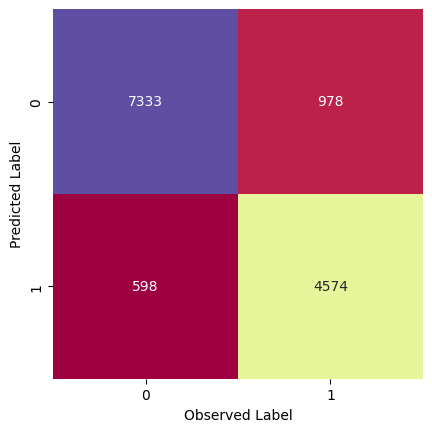

In [40]:
cm_rf = confusion_matrix(y_res_test, y_pred)
sns.heatmap(cm_rf.T, square=True, annot=True, fmt='d', cbar=False, cmap='Spectral')
plt.xlabel('Observed Label')
plt.ylabel('Predicted Label')

#PROMOTION PREDICTION

In [41]:
dtest = pd.read_csv("Employee Promotion_test.csv")
dtest.head(5)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,51
2,72255,Sales & Marketing,region_13,Bachelor's,m,other,1,31,1.0,4,0,47
3,38562,Procurement,region_2,Bachelor's,f,other,3,31,2.0,9,0,65
4,64486,Finance,region_29,Bachelor's,m,sourcing,1,30,4.0,7,0,61


In [42]:
dtest1 = dtest[["department","region","no_of_trainings","awards_won?","avg_training_score","previous_year_rating"]]
dtest1.head(5)

,department,region,no_of_trainings,awards_won?,avg_training_score,previous_year_rating
0,Technology,region_26,1,0,77,NaN
1,HR,region_4,1,0,51,3.0
2,Sales & Marketing,region_13,1,0,47,1.0
3,Procurement,region_2,3,0,65,2.0
4,Finance,region_29,1,0,61,4.0


In [43]:
dtest1.dtypes

department               object
region                   object
no_of_trainings           int64
awards_won?               int64
avg_training_score        int64
previous_year_rating    float64
dtype: object

In [44]:
dtest1['awards_won?'] = dtest1['awards_won?'].astype(str)
dtest1['no_of_trainings'] = dtest1['no_of_trainings'].astype(str)
dtest1.dtypes

<ipython-input-44-ece55dba7356>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest1['awards_won?'] = dtest1['awards_won?'].astype(str)
<ipython-input-44-ece55dba7356>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest1['no_of_trainings'] = dtest1['no_of_trainings'].astype(str)


department               object
region                   object
no_of_trainings          object
awards_won?              object
avg_training_score        int64
previous_year_rating    float64
dtype: object

In [45]:
dtest1['awards_won?'] = dtest1['awards_won?'].replace({'0':'No','1':'Yes'})
dtest1['no_of_trainings'] = dtest1['no_of_trainings'].replace({'2':'>1', '3':'>1','4':'>1','5':'>1','6':'>1','7':'>1','8':'>1','9':'>1','10':'>1'})

<ipython-input-45-2f57215b5656>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest1['awards_won?'] = dtest1['awards_won?'].replace({'0':'No','1':'Yes'})
<ipython-input-45-2f57215b5656>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest1['no_of_trainings'] = dtest1['no_of_trainings'].replace({'2':'>1', '3':'>1','4':'>1','5':'>1','6':'>1','7':'>1','8':'>1','9':'>1','10':'>1'})


In [46]:
np.sum(dtest1.isnull())

department                 0
region                     0
no_of_trainings            0
awards_won?                0
avg_training_score         0
previous_year_rating    1812
dtype: int64

In [47]:
dtest1["previous_year_rating"] = dtest1["previous_year_rating"].fillna(dtest1["previous_year_rating"].median())
np.sum(dtest1.isnull())

<ipython-input-47-490a77b54eb3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dtest1["previous_year_rating"] = dtest1["previous_year_rating"].fillna(dtest1["previous_year_rating"].median())


department              0
region                  0
no_of_trainings         0
awards_won?             0
avg_training_score      0
previous_year_rating    0
dtype: int64

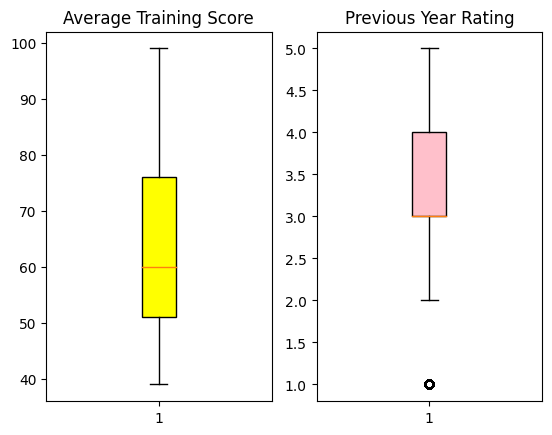

In [48]:
#Checking Outlier
fig, ax=plt.subplots(1,2)
ax[0].boxplot(dtest1["avg_training_score"],patch_artist=True,boxprops=dict(facecolor='yellow'))
ax[0].set_title("Average Training Score")

ax[1].boxplot(dtest1["previous_year_rating"],patch_artist=True,boxprops=dict(facecolor='pink'))
ax[1].set_title("Previous Year Rating")

plt.show()

In [49]:
#Removing Outlier for Previous Year Rating
Q1 = dtest1['previous_year_rating'].quantile(0.25)
Q3 = dtest1['previous_year_rating'].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5*IQR
upper = Q3 + 1.5*IQR

dtest1 = dtest1[dtest1['previous_year_rating'] <= upper]
dtest1 = dtest1[dtest1['previous_year_rating'] >= lower]
dtest1.shape

(20810, 6)

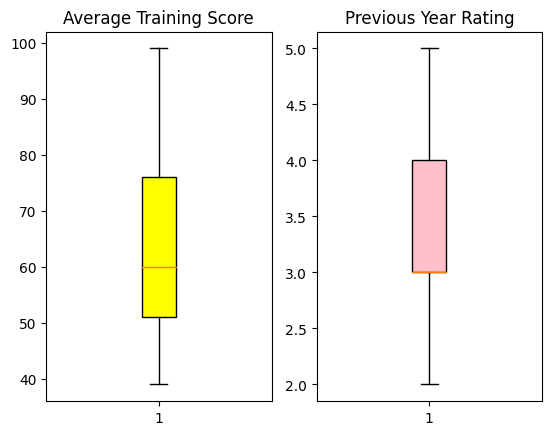

In [50]:
#Checking Outlier
fig, ax=plt.subplots(1,2)
ax[0].boxplot(dtest1["avg_training_score"],patch_artist=True,boxprops=dict(facecolor='yellow'))
ax[0].set_title("Average Training Score")

ax[1].boxplot(dtest1["previous_year_rating"],patch_artist=True,boxprops=dict(facecolor='pink'))
ax[1].set_title("Previous Year Rating")

plt.show()

In [51]:
cat1 = dtest1[['department','region','no_of_trainings','awards_won?']]
num1 = dtest1[['avg_training_score','previous_year_rating']]
cat1 = pd.get_dummies(cat1)
dtest2 = pd.concat([cat1,num1],axis=1,join='inner')
dtest2.head(5)

,department_Analytics,department_Finance,department_HR,department_Legal,department_Operations,department_Procurement,department_R&D,department_Sales & Marketing,department_Technology,region_region_1,...,region_region_6,region_region_7,region_region_8,region_region_9,no_of_trainings_1,no_of_trainings_>1,awards_won?_No,awards_won?_Yes,avg_training_score,previous_year_rating
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,1,0,1,0,77,3.0
1,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,51,3.0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,1,0,65,2.0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,1,0,61,4.0
5,0,0,0,0,0,1,0,0,0,0,...,0,1,0,0,1,0,1,0,68,3.0


In [52]:
prediction = rf.predict(dtest2)
print(prediction)

[0 0 0 ... 0 0 1]


In [53]:
prediction_df = pd.DataFrame({'prediction': prediction})
prediction_df.value_counts()

prediction
0             18616
1              2194
dtype: int64

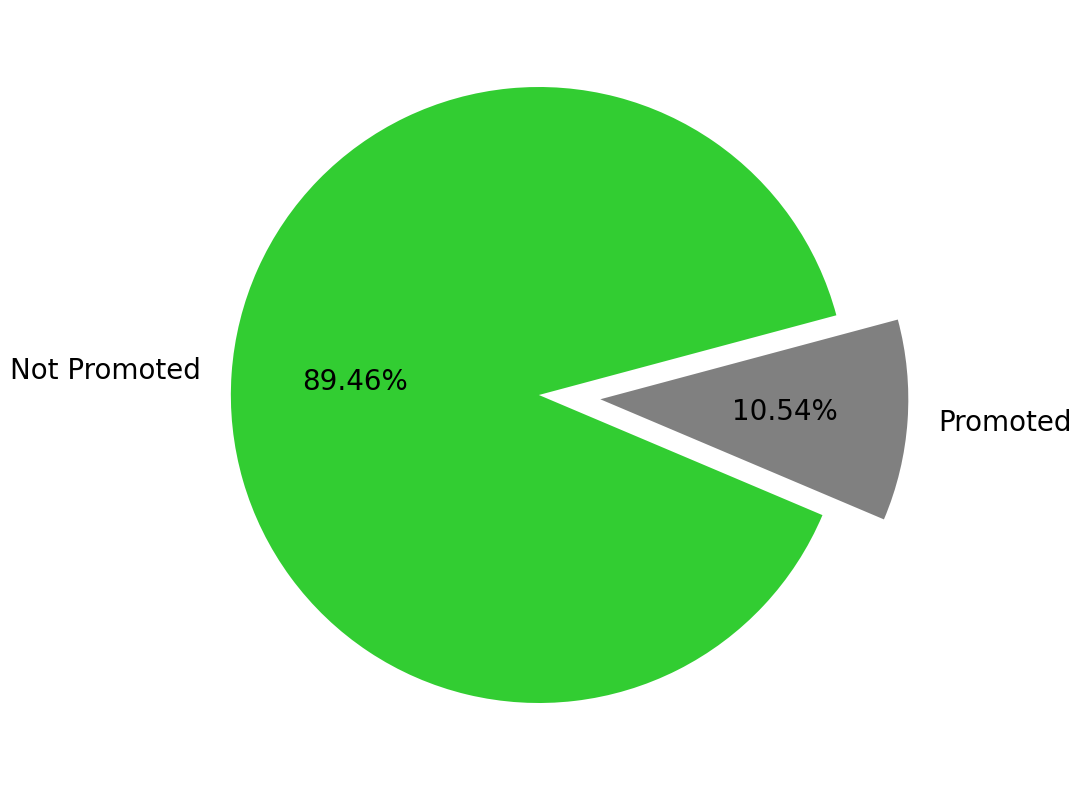

In [54]:
plt.figure(figsize=(10,10))
prediction_status = ['Not Promoted','Promoted']
prediction_number = [18616, 2194]
explode = [0, 0.2]
colors = ['limegreen','gray']
plt.pie(prediction_number, labels=prediction_status, explode=explode, autopct='%1.2f%%', startangle=15, colors=colors,
       textprops = {'fontsize':20})
plt.show()

In [55]:
dtest3 = pd.concat([dtest['employee_id'],dtest1],axis=1,join='inner')
pred_data = pd.concat([dtest3,prediction_df],axis=1,join='inner')
pred_data.head(5)

,employee_id,department,region,no_of_trainings,awards_won?,avg_training_score,previous_year_rating,prediction
0,8724,Technology,region_26,1,No,77,3.0,0
1,74430,HR,region_4,1,No,51,3.0,0
3,38562,Procurement,region_2,>1,No,65,2.0,0
4,64486,Finance,region_29,1,No,61,4.0,0
5,46232,Procurement,region_7,1,No,68,3.0,0


In [56]:
pred_data.groupby('prediction')['avg_training_score','previous_year_rating'].describe()

<ipython-input-56-6d1dfb6b0f2a>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  pred_data.groupby('prediction')['avg_training_score','previous_year_rating'].describe()


avg_training_score                                                \
                        count       mean        std   min   25%   50%   75%   
prediction                                                                    
0                     16517.0  63.670400  13.372356  39.0  51.0  60.0  76.0   
1                      1933.0  63.695292  13.513997  41.0  51.0  60.0  77.0   

                 previous_year_rating                                          \
             max                count      mean       std  min  25%  50%  75%   
prediction                                                                      
0           99.0              16517.0  3.611976  0.947398  2.0  3.0  3.0  4.0   
1           98.0               1933.0  3.613037  0.945336  2.0  3.0  3.0  4.0   

                 
            max  
prediction       
0           5.0  
1           5.0

In [57]:
pred_data.loc[pred_data['prediction'] == 1].head()

,employee_id,department,region,no_of_trainings,awards_won?,avg_training_score,previous_year_rating,prediction
33,77460,Sales & Marketing,region_2,1,No,52,3.0,1
64,24620,Operations,region_26,1,No,60,4.0,1
67,26977,Operations,region_2,1,No,59,3.0,1
89,2347,Analytics,region_15,>1,No,82,5.0,1
90,8443,R&D,region_22,>1,No,86,4.0,1


In [58]:
pred_data.loc[pred_data['prediction'] == 1].tail()

,employee_id,department,region,no_of_trainings,awards_won?,avg_training_score,previous_year_rating,prediction
20769,6472,R&D,region_7,1,No,89,3.0,1
20774,62866,Sales & Marketing,region_16,1,No,51,3.0,1
20778,72642,Analytics,region_22,1,No,86,2.0,1
20801,37599,Sales & Marketing,region_13,1,No,62,5.0,1
20809,6215,Analytics,region_22,>1,No,89,3.0,1
